import numpy as np
import pandas as pd


In [139]:


df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [140]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# 1.data cleaning 
# 2.EDA
# 3.text preprocessing 
# 4.model building
# 5.evaluation
# 6.improvwment 
# 7.website
# 8.deploy

## 1.DATA CLEANING

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [142]:
df.shape

(5572, 5)

In [11]:
# drop last three columns

In [143]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [144]:
df.sample(5)

,v1,v2
3628,ham,Should I head straight there or what
1647,ham,Evening * v good if somewhat event laden. Will...
1225,ham,"sir, you will receive the account no another 1..."
2048,ham,So dont use hook up any how
1568,ham,Today is ACCEPT DAY..U Accept me as? Brother S...


In [145]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [146]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
encoder=LabelEncoder()

In [149]:
df['target']=encoder.fit_transform(df['target'])

In [150]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [152]:
# duplicated values
df.duplicated().sum()

np.int64(403)

In [153]:
df=df.drop_duplicates(keep='first')

In [154]:
df.duplicated().sum()

np.int64(0)

In [155]:
df.shape


(5169, 2)

# 2.EDA

In [156]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [157]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [158]:
import matplotlib.pyplot as plt

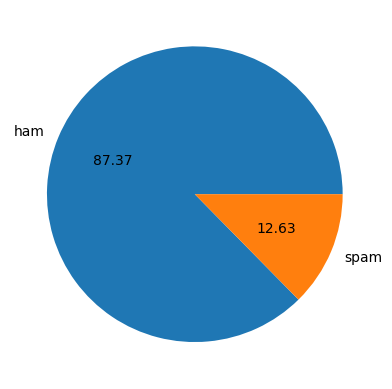

In [159]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [57]:
# data is imbalenced

In [160]:
import nltk

In [161]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [162]:
df['num_characters']=df['text'].apply(len)

/var/folders/s_/bx5ps18s61j6d8jd4ljy1vth0000gn/T/ipykernel_9159/399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [163]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [168]:
df['text'][1]


'Ok lar... Joking wif u oni...'

In [169]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [170]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/s_/bx5ps18s61j6d8jd4ljy1vth0000gn/T/ipykernel_9159/1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [171]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/s_/bx5ps18s61j6d8jd4ljy1vth0000gn/T/ipykernel_9159/754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [172]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [173]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [175]:
# ham
df[df['target']==0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [176]:
# spam
df[df['target']==1][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [103]:
# from here we can see that spam messeges lengths are generally long than ham

In [177]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [178]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

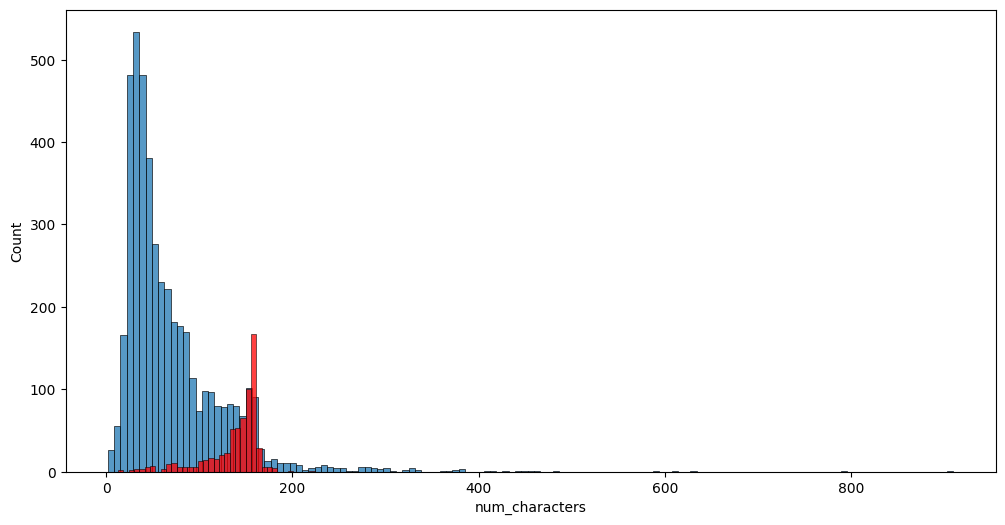

In [179]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])

sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

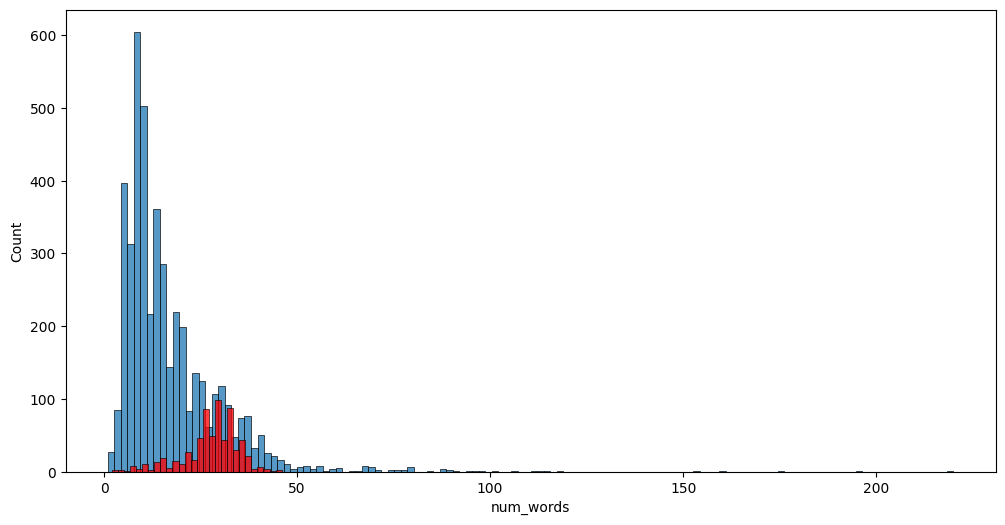

In [180]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')





<Axes: xlabel='num_sentences', ylabel='Count'>

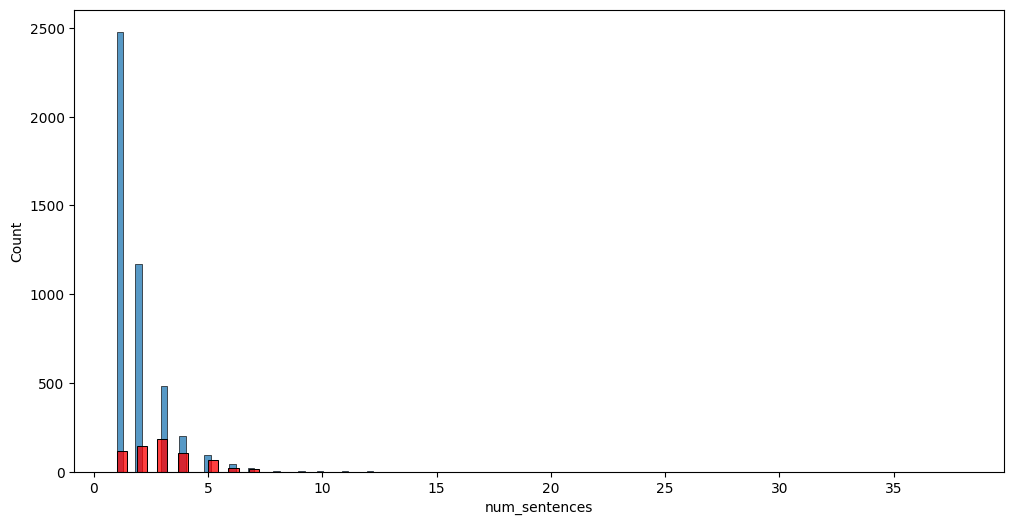

In [181]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])

sns.histplot(df[df['target']==1]['num_sentences'],color='red')

<Axes: >

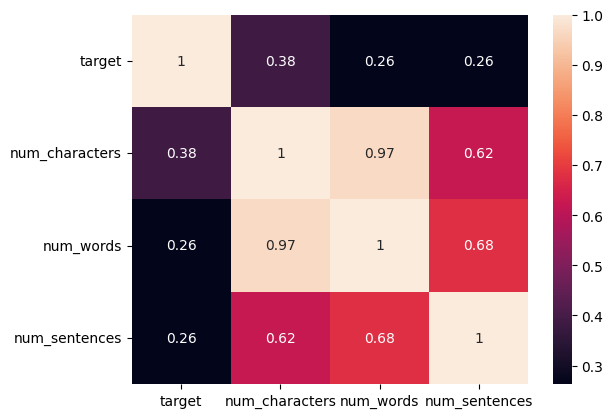

In [182]:
sns.heatmap(df.corr(numeric_only=True),annot=True)



# 3.Data Preprocessing

In [52]:
# lowercase
# tokenisation
# remove special character,stop words
# stemming

In [228]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [229]:
transform_text(" hi!How are,,, you atush dancing in kirtans")

'hi atush danc kirtan'

In [230]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [231]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [232]:
df['transformed_text']=df["text"].apply(transform_text)

In [233]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [234]:
%pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [190]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [235]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

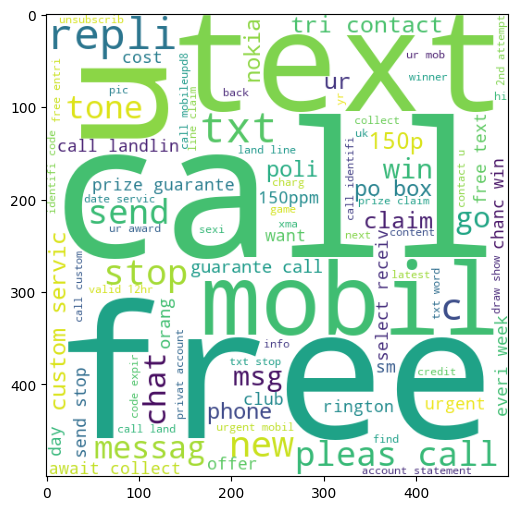

In [236]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [237]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

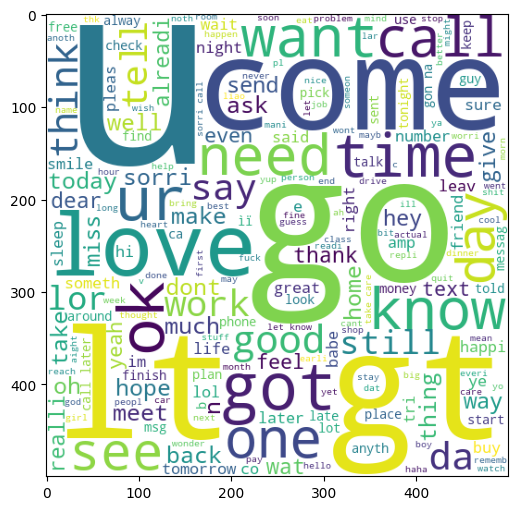

In [238]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [239]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding='latin-1')

# rename columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

# encode target
df['target'] = df['target'].map({'ham': 0, 'spam': 1})


In [240]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['transformed_text'] = df['text'].apply(transform_text)


In [241]:
print(df.columns)


Index(['target', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'num_characters', 'num_words', 'num_sentences', 'transformed_text'],
      dtype='object')


In [242]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,13,1,nah think goe usf live around though


In [243]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [244]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [245]:
from collections import Counter

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text']:
    spam_corpus.extend(msg.split())



In [246]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5572 non-null   int64 
 1   text              5572 non-null   object
 2   num_characters    5572 non-null   int64 
 3   num_words         5572 non-null   int64 
 4   num_sentences     5572 non-null   int64 
 5   transformed_text  5572 non-null   object
dtypes: int64(4), object(2)
memory usage: 261.3+ KB


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [247]:
len(spam_corpus)


11490

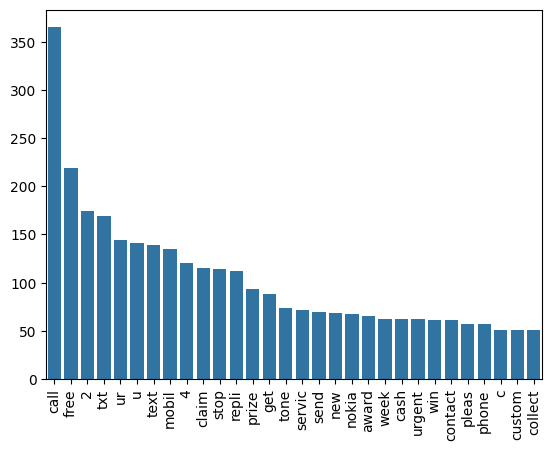

In [248]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

words, counts = zip(*Counter(spam_corpus).most_common(30))

sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=90)
plt.show()



In [249]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [252]:


ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    ham_corpus.extend(msg.split())


        

In [253]:
len(ham_corpus)

38221

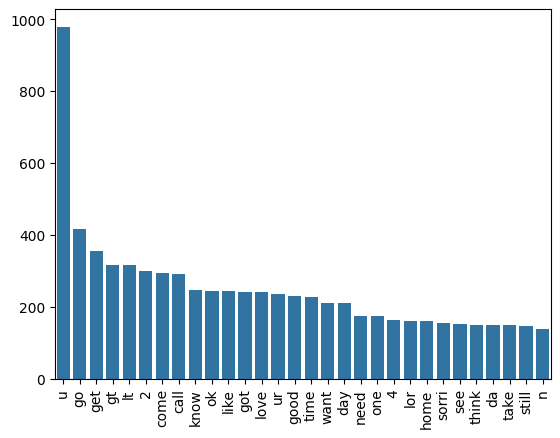

In [254]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

words, counts = zip(*Counter(ham_corpus).most_common(30))

sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=90)
plt.show()


In [257]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

# 4.Model Building

In [333]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [334]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [335]:
X=Tfidf.fit_transform(df['transformed_text']).toarray()

In [319]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [336]:
X.shape

(5572, 3000)

In [337]:
y=df['target'].values

In [338]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [341]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [342]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [343]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [344]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

# go with this bebcoz in spm filtering we value precision more than accuracy

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [345]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


In [346]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))